# 75.06/95.58 Organización de Datos 
# Segundo Cuatrimestre de 2018

#  Trabajo Práctico 2

    

## Enunciado

El segundo trabajo práctico es una competencia de Machine Learning en donde cada grupo debe intentar determinar, para cada usuario presentado, cuál es la probabilidad de que ese usuario realice una conversión en Trocafone en un periodo determinado.

La competencia se desarrollará en la plataforma de Kaggle. En el siguiente link se provee la siguiente información para la competencia:
- https://drive.google.com/file/d/1kQujhvOKAU4EzhaYDbgquf_XKFt9sHMy/view?usp=sharing

En este podrán encontrar los siguientes archivos:

- events_up_to_01062018.csv
- labels_training_set.csv

El archivo **​events_up_to_01062018.csv** ​ contiene en el mismo formato utilizado en el TP1 información de eventos realizado en la plataforma para un conjunto de usuarios hasta el 31/05/2018.

Por otro lado el archivo **​labels_training_set.csv** ​indica para un subconjunto de los usuarios incluidos en el set de eventos **​events_up_to_01062018.csv** ​si los mismos realizaron una conversión (columna label = 1) o no (columna label = 0) desde el 01/06/2018 hasta el 15/06/2018.

La información de estos archivos debe ser utilizada para entrenar un modelo de Machine Learning, de tal forma de poder indicar la probabilidad de que conjunto seleccionado de usuarios realice una conversión desde el 01/06/2018 al 15/06/2018.

Se pedirá indicar esa probabilidad de conversión para usuarios que no se encuentran en el archivo "labels_training_set.csv", pero para los cuales se cuenta con información en **events_up_to_01062018.csv**

El listado de estas personas será provisto en el archivo **trocafone_kaggle_test.csv**

El link a la competencia es:
- https://www.kaggle.com/t/f477d6cc8ce34161a33bcc02ad055912

Los grupos deberán probar distintos algoritmos de Machine Learning para predecir cuál es la probabilidad de conversión del conjunto de usuarios seleccionados de Trocafone para la competencia en el periodo descrito. A medida que los grupos realicen pruebas deben realizar el correspondiente submit en Kaggle para evaluar el resultado de los mismos.

Al finalizar la competencia el grupo que mejor resultado tenga obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el examen por promoción o segundo recuperatorio.

Requisitos para la entrega del TP2:

- El TP debe ser programado en Python o R.
- Debe entregarse una carpeta con el informe de algoritmos probados, algoritmo final utilizado, transformaciones realizadas a los datos, feature engineering, etc.
- La entrega debe incluir también un link a github con el informe presentado en pdf, y todo el código.
- El grupo debe presentar el TP en una computadora en la fecha indicada por la cátedra, el TP debe correr en un lapso de tiempo razonable (inferior a 1 hora) y generar un submission válido que iguale el mejor resultado obtenido por el grupo en Kaggle.

El TP2 se va a evaluar en función del siguiente criterio:
- Cantidad de trabajo (esfuerzo) del grupo: ¿Probaron muchos algoritmos? 
- ¿Hicieron un buen trabajo de pre-procesamiento de los datos y feature engineering?
- Resultado obtenido en Kaggle (obviamente cuanto mejor resultado mejor nota)
- Presentación final del informe, calidad de la redacción, uso de información obtenida en el TP1, conclusiones presentadas.
- Performance de la solución final.



## Inicializacion de librerias

In [1]:
import gc
import locale
import pandas as pd
import matplotlib   #requerido para color map
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import numpy as np


%matplotlib inline
plt.style.use('default')
#sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
# ---------------------------------------------------------------------------------
# Permite corregir el formato luego de aplicar un PIVOT
# ---------------------------------------------------------------------------------

def reset_index(df):
    '''Returns DataFrame with index as columns'''
    index_df = df.index.to_frame(index=False)
    df = df.reset_index(drop=True)
    return pd.merge(index_df, df, left_index=True, right_index=True)


## Cargo los datos

Especifico que ciertas columnas se carguen como categorias por temas de rendimiento

- **timestamp** : Fecha y hora cuando ocurrió el evento. (considerar BRT/ART).
- **event** : Tipo de evento
- **person** : Identificador de cliente que realizó el evento.
- **url** : Url visitada por el usuario.
- **sku** : Identificador de producto relacionado al evento.
- **model** : Nombre descriptivo del producto incluyendo marca y modelo.
- **condition** : Condición de venta del producto
- **storage** : Cantidad de almacenamiento del producto.
- **color** : Color del producto
- **skus** : Identificadores de productos visualizados en el evento.
- **search_term** : Términos de búsqueda utilizados en el evento.
- **staticpage** : Identificador de página estática visitada
- **campaign_source** : Origen de campaña, si el tráfico se originó de una campaña de marketing
- **search_engine** : Motor de búsqueda desde donde se originó el evento, si aplica.
- **channel** : Tipo de canal desde donde se originó el evento.
- **new_vs_returning** : Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.
- **city** : Ciudad desde donde se originó el evento
- **region** : Región desde donde se originó el evento.
- **country** : País desde donde se originó el evento.
- **device_type** : Tipo de dispositivo desde donde se genero el evento.
- **screen_resolution** : Resolución de pantalla que se está utilizando en el dispositivo desde donde se genero el evento.
- **operating_system_version** : Version de sistema operativo desde donde se origino el evento.
- **browser_version** : Versión del browser utilizado en el evento

In [3]:

# Corregir el PATH al archivo si hace falta
eventsFilePath = 'data/events_up_to_01062018.csv'


events = pd.read_csv(eventsFilePath,
                    parse_dates=['timestamp'],
                    dtype={'event':'category', 'city':'category', 'region':'category', 'country':'category', 
                           'condition':'category', 'storage':'category', 'color' : 'category','device_type':'category',
                           'campaign_source':'category', 'search_engine':'category', 'channel':'category', 
                           'new_vs_returning':'category', 'screen_resolution':'category',
                           'url':'category', 'sku': 'float32', 'staticpage':'category', 
                           'operating_system_version':'category','browser_version':'category'},
                    low_memory=False,
                    infer_datetime_format=True)




In [4]:
#events.head(10)
events.dtypes

timestamp                   datetime64[ns]
event                             category
person                              object
url                               category
sku                                float32
model                               object
condition                         category
storage                           category
color                             category
skus                                object
search_term                         object
staticpage                        category
campaign_source                   category
search_engine                     category
channel                           category
new_vs_returning                  category
city                              category
region                            category
country                           category
device_type                       category
screen_resolution                 category
operating_system_version          category
browser_version                   category
dtype: obje

In [5]:
labelsFilePath = 'data/labels_training_set.csv'
labels = pd.read_csv(labelsFilePath,                    
                    dtype={'label':'float32'},
                    low_memory=False)


In [6]:
# ---------------------------------------------------------------------------------
# Visualizo algunos datos
# ---------------------------------------------------------------------------------

#labels.head(3)
#labels.label.value_counts()


In [7]:
# ---------------------------------------------------------------------------------
# Analisis de valores distintos para determinar valores categoricos
# ---------------------------------------------------------------------------------
#events.condition.value_counts() # Estado del celular
#events.storage.value_counts()  # Almacenamiento (Memoria)
#events.color.value_counts() # Color del celular
#events.device_type.value_counts() # Tipo de dispositivo a la venta
#events.screen_resolution.value_counts() # Resolucion de pantalla
#events.operating_system_version.value_counts() # Sistema operativo del equipo
#events.browser_version.value_counts() # Navegador usado por el cliente
#events.campaign_source.value_counts() # Campaña de origen 
#events.search_engine.value_counts() # Search Engine de origen
#events.search_term.value_counts() # Texto buscado en el Search 
#events.channel.value_counts() # Canal que origina el evento
#events.new_vs_returning.value_counts()
#events.url.value_counts()
#events.sku.value_counts()
#events.staticpage.value_counts()
#events.model.value_counts()
#events.event.value_counts()


## Featured Extraction

El objetivo de esta etapa es agregar las columnas que poreciso para hacer más facil el proceso de análisis.

### Nuevos Features

**Agreguen sus ideas !!! **.

Despues vemos si podemos agregar el codigo para obtenerlo

#### Relacionados al timestamp de la visita

- [x] Numero de dia de la semana (1-7) 
- [x] Numero de dia del mes (1-31)
- [x] Numero de dia del año (1-365)
- [x] Hora (0-23)
- [X] Fecha de alta como nuevo usuario


#### Relacionados al producto

- [x] Marca
- [x] Modelo
- [x] Cantidad de marcas visualizadas

#### Otros

- [ ] Referrer de la primera visita
- [x] Referrers
- [x] dia del año ultima conversion
- [x] dias sin convertir
- [X] Cantidad de dias activo
- [X] Cantidad de eventos por tipo
- [ ] Cantidad de paginas visitadas en la sesion (ver como analizar sesiones)
- [X] Duracion minima de una sesion
- [X] Duracion maxima de una sesion
- [X] Duracion promedio de las sesiones
- [X] Cantidad de sesiones
- [ ] Cantidad de compras anteriores en los ultimos 15/30/60/90/120 dias 
- [X] Fecha de la ultima conversion
- [ ] Cantidad de modelos distintos visualizados
- [x] Cantidad de accesos por canales
- [x] Pais
- [x] Condicion (estado del producto)
- [x] Dispositivo usado
- [x] Campaña




### Propiedades relacionadas al momento del evento

In [8]:
# ---------------------------------------------------------------------------------
# Completa el dataset con los las propiedades relacionadas a la fecha y hora
# ---------------------------------------------------------------------------------
# Numero de dia en el mes
events['dia_mes'] = events.timestamp.dt.day

# Numero de dia de la semana
events['dia_semana'] = events.timestamp.dt.dayofweek 

# Numero de dia del año (sirve para hacer diferencia de dias)
events['dia_anio'] = events.timestamp.dt.dayofyear

# Numero de mes
events['mes'] = events.timestamp.dt.month

# Hora
events['hora'] = events.timestamp.dt.hour

# Numero de semana 
events['semana'] = events.timestamp.dt.week


In [9]:
persona_dia_semana = events.pivot_table(index='person',columns='dia_semana', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_dia_semana.columns = ['dia_semana_' +  str(col).replace(' ','_') for col in persona_dia_semana.columns]
#display(persona_dia_semana.head(5))

persona_dia_mes = events.pivot_table(index='person',columns='dia_mes', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_dia_mes.columns = ['dia_mes_' +  str(col).replace(' ','_') for col in persona_dia_mes.columns]
#display(persona_dia_mes.head(5))

persona_hora = events.pivot_table(index='person',columns='hora', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_hora.columns = ['hora_' +  str(col).replace(' ','_') for col in persona_hora.columns]
#display(persona_hora.head(5))


### Separa marca y modelo

In [10]:
# ---------------------------------------------------------------------------------
#  Determina Marca y modelo y lo agrega como columnas
# ---------------------------------------------------------------------------------
def getMarca(marcaModelo):
    if (marcaModelo == marcaModelo):
        x=marcaModelo.split()
        return ''.join(x[0:1])
    return marcaModelo

def getModelo(marcaModelo):
    if (marcaModelo == marcaModelo):
        x=marcaModelo.split()
        return ' '.join(x[1:])
    return marcaModelo



# agrega columnas de marca y modelo
events['marca'] = events.model.apply(lambda x: getMarca(str(x))).astype('category')
events['modelo'] = events.model.apply(lambda x: getModelo(str(x))).astype('category') 

# Elimina la columna model (solo hacerlo al finalde las pruebas por las dudas)
#events.drop(['model'], axis=1 , inplace=True)




### MARCAS

Marcas visualizadas
Cantidad de marcas visualizada por la persona

In [11]:
persona_marca = events[(events.event=='viewed product')].pivot_table(index='person',columns='marca', values='timestamp', aggfunc='count', fill_value=0).fillna(0).astype(int)
persona_marca.columns = ['marca_' +  col.replace(' ','_') for col in persona_marca.columns]

#Cantidad de marcas visualizada por la persona
persona_m = events[(events.event=='viewed product')].groupby(['person','marca']).size().to_frame('marca_cant').reset_index().drop('marca_cant', axis=1)
persona_m = persona_m.groupby(['person']).size().to_frame('cant_marcas_vistas').reset_index()

#Junta los dos df
persona_marca = pd.merge(persona_marca, persona_m, how='outer', on=['person'])#.drop('country', axis=1).drop_duplicates()



#persona_marca.count()


del persona_m
gc.collect()

166


### MODELOS

In [12]:
persona_modelo = (events.set_index('person')['modelo']
        .str.split(expand=True)
        .stack()
        .reset_index(level=1, drop=True)
        .reset_index(name='modelo')
        .drop_duplicates()
       )
persona_modelo = pd.concat([persona_modelo,pd.get_dummies(persona_modelo['modelo'], prefix='mod')],axis=1).drop('modelo', axis=1).groupby('person').sum()

#person_modelo.head(3)


In [13]:

"""
persona_search_term = (events[events.search_term > ''].set_index('person')['search_term']
        .str.split(expand=True)
        .stack()
        .reset_index(level=1, drop=True)
        .reset_index(name='search_term')
        .drop_duplicates()
       )
persona_search_term = pd.concat([persona_search_term,pd.get_dummies(persona_search_term['search_term'], prefix='search')],axis=1).drop('search_term', axis=1).groupby('person').sum()

persona_search_term.head(10)
"""


"\npersona_search_term = (events[events.search_term > ''].set_index('person')['search_term']\n        .str.split(expand=True)\n        .stack()\n        .reset_index(level=1, drop=True)\n        .reset_index(name='search_term')\n        .drop_duplicates()\n       )\npersona_search_term = pd.concat([persona_search_term,pd.get_dummies(persona_search_term['search_term'], prefix='search')],axis=1).drop('search_term', axis=1).groupby('person').sum()\n\npersona_search_term.head(10)\n"

### Dias activo

In [14]:
# Dias activo
#---------------------------------------
dias_activo = events.groupby('person').dia_anio.nunique().to_frame(name='dias_activo').reset_index() #.set_index('person')
#dias_activo.head(3)

### Condicion del equipo

In [15]:
# Condition 
#---------------------------------------
#pd.get_dummies(events.reset_index().set_index('person')['condition'])  #[events.condition.notnull()]

persona_condicion = reset_index(
    events.groupby(['person','condition']).size().to_frame(name='condicion_cant').reset_index()\
    .pivot_table(index='person',columns='condition', values='condicion_cant', aggfunc='sum').fillna(0).astype(int)
).rename(index=str,columns={"Bom": "cond_bien", "Bom - Sem Touch ID": "cond_bien_sin_touchId", "Excelente": "cond_Excelente", "Muito Bom": "cond_muy_bien", "Novo": "cond_nuevo"})    

#persona_condicion.head(3)

### Pais

In [16]:
# Cantidad minima de personas para considerar el pais sino engloba por 'Otros'
cantidad_min_por_pais = 10

paises_personas_tmp = events.groupby(['person','country']).size().to_frame(name='country_cant').reset_index().drop('country_cant', axis=1)
#display(paises_personas_tmp.head(3))

# Cambia Country por pais agrupando en 'Otros' los muy chiquitos
paises = paises_personas_tmp.groupby(['country']).size().to_frame(name='person_cant').reset_index().sort_values('person_cant', ascending=False).reset_index()
paises = paises.drop(['index'], axis=1)
paises['pais'] = paises.apply(lambda r: r['country'] if r['person_cant'] >= cantidad_min_por_pais else 'Otros', axis=1)
paises = paises.drop(['person_cant'], axis=1)
# Corrige nombres de paises especificos
paises.loc[paises.pais == 'Unknown', 'pais'] = 'Desconocido'
paises.loc[paises.pais == 'United Kingdom', 'pais'] = 'UK'
paises.loc[paises.pais == 'United States', 'pais'] = 'USA'

# Genera la tabla de personas paises donde cada persona aparece una sola vez
paises_personas_tmp = paises_personas_tmp.drop_duplicates()
persona_pais = pd.merge(paises_personas_tmp, paises, how='inner', on=['country']).drop('country', axis=1).drop_duplicates()
persona_pais = pd.concat([persona_pais,pd.get_dummies(persona_pais['pais'], prefix='pais')],axis=1).drop('pais', axis=1).groupby('person').sum()



del paises
del paises_personas_tmp
gc.collect()

123

#### Algunos analisis sobre datos de paises


In [17]:
# Hay 1200 personas que no son de brasil

#pais_resumen[(pais_resumen.Brazil == 0) & \
#             (pais_resumen.Unknown ==0) &\
#             ((pais_resumen['United States'] ==0))]

In [18]:
#---------------------------------------
# country -  Person que figuran en mas 
# de un pais
#---------------------------------------

#events.groupby(['person','country']).size().to_frame(name='country_cant')\
#    .groupby(['person']).filter(lambda g: len(g) > 1).groupby(['person']).size().to_frame(name='country_cant')\
#    .sort_values('country_cant',ascending=False)


### Dispositivo (Device_type)

In [19]:
# device_type
#---------------------------------------

persona_device = events.groupby(['person','device_type']).size().to_frame('device_type_cant').reset_index().drop('device_type_cant', axis=1)
persona_device = pd.concat([persona_device,pd.get_dummies(persona_device['device_type'], prefix='dispo')],axis=1).drop('device_type', axis=1).groupby('person').sum()
#persona_device.head(5)




### Canal

Cantidad de acceso por cada canal

In [20]:

# Cantidad de acceso por cada canal
#---------------------------------------

persona_canal = events.groupby(['person','channel']).size().to_frame('channel_cant').reset_index()\
    .pivot_table(index='person',columns='channel', values='channel_cant', aggfunc='sum').fillna(0).astype(int)   
persona_canal.columns = ['canal_' +  col for col in persona_canal.columns]

#persona_canal.head(5)
 

###  Campaña de origen 

In [21]:
persona_campania = events.groupby(['person','campaign_source']).size().to_frame('campania_cant').reset_index()\
    .pivot_table(index='person',columns='campaign_source', values='campania_cant', aggfunc='sum').fillna(0).astype(int)   
persona_campania.columns = ['campania_' +  col.replace(' ','_') for col in persona_campania.columns]




### Static Page

In [22]:
"""
CustomerService                      5239
FaqEcommerce                         1317
AboutUs                              1217
Quiosks                               868
trust-trocafone                       632
TermsAndConditionsReturnEcommerce     528
galaxy-s8                             380
Conditions                            285
how-to-sell                           234
how-to-buy                            232
TermsAndConditionsEcommerce           119
club-trocafone                        107
PrivacyEcommerce                       28
black_friday                           15
"""
persona_staticpage = events.groupby(['person','staticpage']).size().to_frame('staticpage_cant').reset_index()\
    .pivot_table(index='person',columns='staticpage', values='staticpage_cant', aggfunc='sum').fillna(0).astype(int)
    
persona_staticpage.columns = ['staticpage_' +  col.replace(' ','_') for col in persona_staticpage.columns]



In [23]:
#persona_staticpage.head(5)


### storage

Almacenamiento (Memoria)

In [24]:
persona_storage = events.groupby(['person','storage']).size().to_frame('storage_cant').reset_index()\
    .pivot_table(index='person',columns='storage', values='storage_cant', aggfunc='sum').fillna(0).astype(int)   
persona_storage.columns = ['storage_' +  col.replace(' ','_') for col in persona_storage.columns]



In [25]:
#persona_storage.head(3)

### color

Color del celular


In [26]:
persona_color = events.groupby(['person','color']).size().to_frame('color_cant').reset_index()\
    .pivot_table(index='person',columns='color', values='color_cant', aggfunc='sum').fillna(0).astype(int)   
persona_color.columns = ['color_' +  col.replace(' ','_') for col in persona_color.columns]


In [27]:
persona_color.head(5)

color_Amarelo  color_Ametista  color_Azul  color_Azul_Escuro  color_Azul_Safira  color_Azul_Topázio  color_Bambu  color_Black_Piano  color_Branco  color_Branco_Azul  color_Branco_Azul_Navy  color_Branco_Bambu  color_Branco_Cabernet  color_Branco_Dourado  color_Branco_Framboesa  color_Branco_Pink  color_Branco_Verde  color_Branco_Vermelho  color_Cabernet  color_Cinza  color_Cinza_espacial  color_Cobre  color_Coral  color_Couro_Marrom  color_Couro_Navy  color_Couro_Vinho  color_Couro_Vintage  color_Cromo  color_Dourado  color_Framboesa  color_Indigo  color_Iuna  color_Olympic_Edition  color_Ouro  color_Ouro_Rosa  color_Platinum  color_Prata  color_Prateado  color_Preto  color_Preto_Asfalto  color_Preto_Azul  color_Preto_Azul_Navy  color_Preto_Bambu  color_Preto_Branco  color_Preto_Brilhante  color_Preto_Cabernet  color_Preto_Matte  color_Preto_Pink  color_Preto_Tabaco  color_Preto_Verde  color_Preto_Vermelho  color_Rosa  color_Rose  color_Rouge  color_Roxo  color_Silver  \
person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
0008ed71              0               0           0                  0                  0                   0            0                  0             0                  0                       0                   0                      0                     0                       0                  0                   0                      0               0            0                     1            0            0                   0                 0                  0                    0            0              1                0             0           0                      0           0                0               0            0               0            1                    0                 0                      0                  0                   0                      0                     0                  0                 0                   0                  0                     0           0           0            0           0             0   
00091926              0               2           3                  2                  0                   0            1                  1             3                  0                       0                   0                      0                     0                       0                  0                   0                      0               0            0                    65            0            0                   0                 0                  0                    0            0            102                0             0           0                      0           1               29               1            1              43           79                    0                 0                      0                  0                   0                      5                     0                 29                 0                   0                  0                     0           3           0            0           0             0   
00091a7a              0   

### Indicadores de sesiones

In [28]:
#----------------------------------------------------- 
# Calculo de indicadores de sesiones
#----------------------------------------------------- 

# Plazo maximo en minutos para considerar dos eventos consecutivos que pertenecen a la misma sesion
plazolapsoMismaSesion = 30

#Ordena los registros
sesiones = events[['person','timestamp']].sort_values(by=['person','timestamp'],ascending=[True,True])

#Calcula el lapso transcurrido con el evento anterior
sesiones['lapso'] = sesiones['timestamp'].diff().dt.total_seconds()/60.0

#Si cambia de persona no calcula lapso
sesiones.loc[sesiones.person != sesiones.person.shift(), 'lapso'] = None

# Si supera el lapso maximo es una nueva sesion no calcula lapso
sesiones.loc[sesiones.lapso > plazolapsoMismaSesion, 'lapso'] = None

# Auxiliares Booleanos para calcular la duracion de las sesiones
# Estoy en la misma sesion si no supero al plazo maximo entre eventos (los NaN tampoco son de la misma sesion)
sesiones['misma_sesion'] = sesiones['lapso'] < plazolapsoMismaSesion

# El negado del anterior indica donde empieza la sesion
sesiones['inicio_sesion'] = ~sesiones.misma_sesion 

# Un registro antes del fin de sesion indica donde termina la sesion anterior por lo que 
# dezplaza el inicio de sesion un lugar para atras
sesiones['fin_sesion'] = sesiones.inicio_sesion
sesiones.fin_sesion = sesiones.fin_sesion.shift(-1).fillna(True)

# Auxiliar para contabilizar las sesiones. 
sesiones['aux_sesion'] = 0

# Pone 1 a todos los auxiliares con inicios de sesion
sesiones.loc[sesiones.inicio_sesion, 'aux_sesion'] = 1

# Numera todas las sesiones usando corte de control y la funcion de suma acumulada
sesiones['nume_sesion'] = sesiones.groupby(['person'])['aux_sesion'].apply(lambda x: x.cumsum())

# Obtiene la tabla resumida de sesiones por cada person 
# Acumula los lapsos entre eventos de cada sesion
sesiones_resumen = sesiones.groupby(['person','nume_sesion']).agg({'lapso': np.sum }).reset_index()

# Calcula las duraciones minima, maxima y total de la duracion de las sesiones y la cantidad de sesiones
sesiones_resumen = sesiones_resumen.groupby(['person']).agg({'lapso': [np.min,np.max,np.sum], 'nume_sesion' : np.size }).reset_index()

# Cambia nombre a las columnas
sesiones_resumen.columns = ['person', 'sesion_minutos_min', 'sesion_minutos_max','sesion_minutos_sum','sesion_cant' ] 

#Agrega duracon Promedio sesion
sesiones_resumen['sesion_minutos_avg'] = sesiones_resumen.sesion_minutos_sum / sesiones_resumen.sesion_cant

#sesiones_resumen.head(3)



#'-- Esto es para que no me llene la pantalla --'
del sesiones
gc.collect()


133

### Eventos Importantes

#### Tipo de evento

#### dias_sin_convertir (previas al 2018-06-01)

LKuego se debe completar con un numero alto tipo 9999 para aquellos casos en que no convirió antes

#### ult_vis_producto
Dia de la ultima visualizacion de producto

#### aparicion
Dia de la primera visita al sitio


In [29]:


events_person_all    = events.pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_15     = events[events.timestamp >= '2018-05-15'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_15_30  = events[(events.timestamp >= '2018-05-01') & (events.timestamp < '2018-05-16')] #.pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_30     = events[events.timestamp >= '2018-05-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_60     = events[events.timestamp >= '2018-04-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)
#events_person_90     = events[events.timestamp >= '2018-03-01'].pivot_table(index='person',columns='event', values='timestamp', aggfunc='count').fillna(0).astype(int)


#events_person_all.sort_values(by=['conversion' , 'staticpage' ], ascending=[False, False]).head(50)
persona_eventos = reset_index(events_person_all)
#persona_eventos.head(5)


del events_person_all
gc.collect()

88

In [30]:
#Fecha de la ultima conversion conocida
import datetime
dia20180601 = datetime.date(2018,6,1).timetuple().tm_yday

persona_conversiones = events[events.event=='conversion'].groupby(['person'])['dia_anio'].max().to_frame(name='dia_ult_conver').reset_index()
persona_conversiones['dias_sin_convertir'] = -persona_conversiones.dia_ult_conver + dia20180601
persona_conversiones.drop('dia_ult_conver', axis=1, inplace=True)
persona_eventos = pd.merge(persona_eventos, persona_conversiones,on='person', how='outer')
persona_eventos.fillna(value=9999,inplace=True)
#persona_eventos.head(5)

del persona_conversiones
gc.collect()


28

In [31]:
# Fecha primera visualizacion de producto

persona_pri_vis = events[(events.event =='viewed product' )].groupby('person')['dia_anio'].min().to_frame(name='primera_vis_producto').reset_index()
persona_eventos = pd.merge(persona_eventos, persona_pri_vis,on='person', how='outer')
persona_eventos.fillna(value=0,inplace=True)
#persona_eventos.head(5)

del persona_pri_vis
gc.collect()

42

In [32]:
# dias desde utima visualizacion de producto
persona_ult_vis = events[(events.event =='viewed product' )].groupby('person')['dia_anio'].max().to_frame(name='ult_vis_producto').reset_index()
persona_ult_vis['dias_sin_vis_producto'] = -persona_ult_vis.ult_vis_producto + dia20180601
persona_ult_vis.drop('ult_vis_producto', axis=1, inplace=True)
#persona_ult_vis.head(5)
persona_eventos = pd.merge(persona_eventos, persona_ult_vis,on='person', how='outer')
persona_eventos.fillna(value=9999,inplace=True)
#persona_eventos.head(5)

del persona_ult_vis
gc.collect()

69

In [33]:
# Fecha del primer registro en el sitio (representa la edad en el sitio)
persona_aparicion = events.groupby('person')['dia_anio'].min().to_frame(name='aparicion').reset_index()
persona_eventos = pd.merge(persona_eventos, persona_aparicion,on='person', how='outer')
persona_eventos.fillna(value=0,inplace=True)
#persona_eventos.head(5)

del persona_aparicion
gc.collect()

42

In [34]:
eventos_cantidad = events.groupby('person').size().to_frame(name='eventos_cant').reset_index()
persona_eventos = pd.merge(persona_eventos, eventos_cantidad, on='person', how='outer')
persona_eventos.fillna(value=0,inplace=True)

del eventos_cantidad
gc.collect()

42

In [35]:

#persona_eventos.head(5)


# ---------------------------------------------------------------------------------
# Visualizo algunos datos
# ---------------------------------------------------------------------------------
# events.head(3)

per = 'be009232'
abc=events[(events.person==per)]
abc.to_csv('data/PERSON_' + per + '.csv')



In [36]:
# Estadistica de SKU visualizados

persona_group = events[(events.event =='viewed product' )].groupby('person')
persona_prod = persona_group.person.unique().to_frame('A').reset_index()
persona_prod.drop('A', axis=1, inplace=True)


d1 = persona_group.sku.min().to_frame(name='sku_min').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.sku.max().to_frame(name='sku_max').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.sku.mean().to_frame(name='sku_mean').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.sku.std().to_frame(name='sku_std').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.sku.nunique().to_frame(name='sku_cant').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.marca.nunique().to_frame('marca_cant').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.condition.nunique().to_frame('condition_cant').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.storage.nunique().to_frame('storage_cant').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')

d1 = persona_group.color.nunique().to_frame('color_cant').reset_index()
persona_prod = pd.merge(persona_prod, d1,on='person', how='outer')


del d1
del persona_group
gc.collect()


189

In [37]:
#persona_prod.head(3)

### searched products

In [38]:
persona_search = events[(events.event =='searched products' ) & events.skus.notnull()][['person','skus']]
persona_search['skulist'] = persona_search.skus.apply(lambda x: np.array(x.split(','), dtype=np.float32))
persona_search['search_sku_min'] = persona_search.skulist.apply(lambda x: np.min(x)) 
persona_search['search_sku_max'] = persona_search.skulist.apply(lambda x: np.max(x)) 
persona_search['search_sku_interval'] = persona_search.search_sku_max -persona_search.search_sku_min
persona_search['search_sku_mean']= persona_search.skulist.apply(lambda x: np.mean(x)) 
persona_search['search_sku_std'] = persona_search.skulist.apply(lambda x: np.std(x)) 
persona_search['search_sku_median'] = persona_search.skulist.apply(lambda x: np.median(x)) 
persona_search['search_sku_sum'] = persona_search.skulist.apply(lambda x: np.sum(x)) 
persona_search['search_sku_cant'] = persona_search.skulist.apply(lambda x: len(x)) 

persona_search.drop(['skus','skulist'], axis=1 , inplace=True)
#persona_search.head(3)


aggregations = {
    'search_sku_min'     : ['mean', 'min'],
    'search_sku_max'     : ['mean', 'max'],
    'search_sku_interval': ['mean', 'std', 'min', 'max', 'median'],
    'search_sku_mean'    : ['mean', 'std', 'min', 'max', 'median'],
    'search_sku_std'     : ['mean', 'min', 'max', 'median'],
    'search_sku_median'  : ['mean', 'std', 'min', 'max', 'median'],
    'search_sku_sum'     : ['sum', 'mean', 'std', 'min', 'max', 'median'],
    'search_sku_cant'    : ['sum', 'mean', 'std', 'min', 'max', 'median']
}

persona_search_sku = persona_search.groupby('person').agg(aggregations).reset_index()
persona_search_sku.columns = ["_".join(x) for x in persona_search_sku.columns.ravel()]
persona_search_sku.columns = ['person' if x=='person_' else x for x in persona_search_sku.columns]


del persona_search
gc.collect()


140

In [39]:
persona_search_sku.head(3)


person  search_sku_min_mean  search_sku_min_min  search_sku_max_mean  search_sku_max_max  search_sku_interval_mean  search_sku_interval_std  search_sku_interval_min  search_sku_interval_max  search_sku_interval_median  search_sku_mean_mean  search_sku_mean_std  search_sku_mean_min  search_sku_mean_max  search_sku_mean_median  search_sku_std_mean  search_sku_std_min  search_sku_std_max  search_sku_std_median  search_sku_median_mean  search_sku_median_std  search_sku_median_min  search_sku_median_max  search_sku_median_median  search_sku_sum_sum  search_sku_sum_mean  search_sku_sum_std  search_sku_sum_min  search_sku_sum_max  search_sku_sum_median  search_sku_cant_sum  search_sku_cant_mean  search_sku_cant_std  search_sku_cant_min  search_sku_cant_max  search_sku_cant_median
0  000c79fe          5719.444444              1374.0         11559.666667             15850.0               5840.222222              2236.578457                   2414.0                   8206.0                      5948.0           7752.424642          3083.757906          3407.500000         13132.571289             7372.500000          1857.246182          900.634460         2811.833984            1621.538452             7759.222222            2906.287592                 2835.5                12772.0                    6923.5            771599.0         85733.222222        28082.335003             40890.0            126813.0                88470.0                  103             11.444444             1.666667                    7                   12                    12.0
1  000e619d          3227.500000              2694.0         10204.833333             13276.0               6977.333333              2239.822999                   4097.0                   8800.0                      8290.0           6345.974935          2011.902500          4089.000000          9402.599609             6831.750000          2446.933838         1640.524414         3088.557373            2611.719727             5882.500000            2368.739728                 3185.0                 9392.0                    6511.0            438105.0         73017.500000        19128.759340             49068.0             94026.0                81981.0                   70             11.666667             0.816497                   10                   12                    12.0
2  001001be          1196.823529               333.0          6283.941176              6791.0               5087.117647               513.940887                   4073.0                   5917.0                      4895.0           3256.191205           766.808490          2778.916748          4477.166504             2778.916748          1714.344260         1631.877808         1965.222656            1637.590332             3575.588235            1334.881130                 2831.5                 5905.5                    2831.5            664263.0         39074.294118         9201.702979             33347.0             53726.0                33347.0                  204             12.000000             0.000000                   12                   12                    12.0

## Armado del Dataset

In [40]:
#Inicializa el dataframe de personas
personas = events.person.drop_duplicates().to_frame()

personas = pd.merge(personas, sesiones_resumen,    on='person', how='outer')
personas = pd.merge(personas, persona_prod,        on='person', how='outer')
personas = pd.merge(personas, persona_eventos,     on='person', how='outer')
personas = pd.merge(personas, persona_search_sku,  on='person', how='outer')
personas = pd.merge(personas, persona_campania,    on='person', how='outer')
personas = pd.merge(personas, dias_activo,         on='person', how='outer')
#personas = pd.merge(personas, persona_dia_semana,  on='person', how='outer')
#personas = pd.merge(personas, persona_dia_mes,     on='person', how='outer')
#personas = pd.merge(personas, persona_hora,        on='person', how='outer')
personas = pd.merge(personas, persona_canal,       on='person', how='outer')
personas = pd.merge(personas, persona_condicion,   on='person', how='outer')
#personas = pd.merge(personas, persona_pais,        on='person', how='outer')  
#personas = pd.merge(personas, persona_marca,       on='person', how='outer')  
#personas = pd.merge(personas, persona_modelo,      on='person', how='outer')  
personas = pd.merge(personas, persona_device,      on='person', how='outer')
personas = pd.merge(personas, persona_staticpage,  on='person', how='outer')
personas = pd.merge(personas, persona_storage,     on='person', how='outer')
personas = pd.merge(personas, persona_color,       on='person', how='outer')






#personas = pd.merge(personas, labels,              on='person', how='inner')


# GRaba el CSV de salida
#personas.to_csv('data\personas_resumen.csv')
#personas.count()


In [41]:
# Vemos que hay personas que no tienen informacion !!!!
#personas.count()
#personas.dtypes

# Importante

El dataset tiene la etiqueta a predecir en la segunda columna por comodidad

A mi me tarda unos minutos en generar este nuevo Dataset.
Me quedan un par de features por generar pero pensaba empezar por esto.



## Probando XGBoost

In [42]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [43]:

#--------------------------------
# Train
#--------------------------------
# Armo dataset test/eval
personas_train = pd.merge(personas, labels,    on='person', how='inner')
personas_train.fillna(value=0,inplace=True)

# Hace un split de los dataset de entrenamiento y evaluacion
X, y = personas_train.iloc[:,1:-1],personas_train.iloc[:,-1]
X_train, x_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2  )   #, random_state=123

# Arma las Dmatrices usadas en el entrenamiento
DMatriz_train = xgb.DMatrix( data = X_train, label = y_train)
DMatriz_eval = xgb.DMatrix(  data = x_eval,  label = y_eval)


#---------------------------------------------------------------------------------------------------
# Parametros del XGBOOST (es un diccionario)
#---------------------------------------------------------------------------------------------------
param = {'silent': 1, 'objective': 'binary:logistic'}

param['booster'] = 'gbtree'  #gbtree, gblinear or dart
param['max_depth'] = 6
param['min_child_weight'] = 1 
param['alpha'] = 10     #L1 regularization term on weights default=1 
param['eta'] = .01    #Step size shrinkage used in update to prevents overfitting. 
param['gamma'] = 50  # Minimum loss reduction required to make a further partition on a leaf node of the tree   
param['lambda'] = 1    #L2 regularization term on weight default=0 
param['scale_pos_weight'] = 18434 / 980
param['eval_metric'] = 'auc'
param['nthread'] = 8
param['max_delta_step'] = 0  #[default=0] Maximum delta step we allow each leaf output to be
param['subsample'] = 1 #[default=1]
param['colsample_bytree'] = 1 # [default=1]
param['tree_method'] = 'exact' #auto, exact, approx, hist, gpu_exact, gpu_hist

# Maxima cantidad de rounds
num_round = 500
detencion_sincambios = 10

evallist = [(DMatriz_eval, 'eval'),(DMatriz_train, 'train')]

bst = xgb.train(param, DMatriz_train, num_round, evallist, early_stopping_rounds=detencion_sincambios)
#bst = xgb.train(param, DMatriz_train, num_round, evallist)
#[144]	eval-auc:0.861267	train-auc:0.889155
#.05 [96]	eval-auc:0.866331	train-auc:0.925476
#.07 [69]	eval-auc:0.871125	train-auc:0.927369
#.09 [51]	eval-auc:0.85196	train-auc:0.928236
#.09 [62]	eval-auc:0.868671	train-auc:0.929081
#.07 [86]	eval-auc:0.889043	train-auc:0.929169
#.07 [58]	eval-auc:0.878109	train-auc:0.900306

[0]	eval-auc:0.823455	train-auc:0.86205
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.82435	train-auc:0.863859
[2]	eval-auc:0.824847	train-auc:0.865169
[3]	eval-auc:0.825575	train-auc:0.865004
[4]	eval-auc:0.8246	train-auc:0.864749
[5]	eval-auc:0.830826	train-auc:0.86769
[6]	eval-auc:0.830541	train-auc:0.868303
[7]	eval-auc:0.831526	train-auc:0.869119
[8]	eval-auc:0.83088	train-auc:0.868956
[9]	eval-auc:0.831091	train-auc:0.869832
[10]	eval-auc:0.830626	train-auc:0.869834
[11]	eval-auc:0.837021	train-auc:0.871301
[12]	eval-auc:0.836569	train-auc:0.871409
[13]	eval-auc:0.836705	train-auc:0.871591
[14]	eval-auc:0.83882	train-auc:0.872658
[15]	eval-auc:0.839797	train-auc:0.873807
[16]	eval-auc:0.840365	train-auc:0.87465
[17]	eval-auc:0.841662	train-auc:0.875618
[18]	eval-auc:0.842959	train-auc:0.876683
[19]	eval-auc:0.843247	train-auc:0.87729
[20]	eval-auc:0.844729	train-auc:0.8

[191]	eval-auc:0.858533	train-auc:0.901664
[192]	eval-auc:0.858627	train-auc:0.901799
[193]	eval-auc:0.858784	train-auc:0.901946
[194]	eval-auc:0.858834	train-auc:0.901964
[195]	eval-auc:0.85896	train-auc:0.902132
[196]	eval-auc:0.858922	train-auc:0.902378
[197]	eval-auc:0.858979	train-auc:0.902496
[198]	eval-auc:0.859016	train-auc:0.902711
[199]	eval-auc:0.859035	train-auc:0.902706
[200]	eval-auc:0.859039	train-auc:0.902891
[201]	eval-auc:0.859068	train-auc:0.902875
[202]	eval-auc:0.859233	train-auc:0.90301
[203]	eval-auc:0.859191	train-auc:0.903198
[204]	eval-auc:0.859218	train-auc:0.903429
[205]	eval-auc:0.859252	train-auc:0.903442
[206]	eval-auc:0.859394	train-auc:0.903545
[207]	eval-auc:0.859483	train-auc:0.903764
[208]	eval-auc:0.859678	train-auc:0.903874
[209]	eval-auc:0.859737	train-auc:0.904087
[210]	eval-auc:0.859775	train-auc:0.90411
[211]	eval-auc:0.859767	train-auc:0.904297
[212]	eval-auc:0.859707	train-auc:0.904449
[213]	eval-auc:0.859822	train-auc:0.904623
[214]	eval-auc

In [44]:
param['max_depth'] = 6
param['min_child_weight'] = 2 
param['alpha'] = 10      # L1 regularization term on weights default=1 
param['eta'] = .035      # Step size shrinkage used in update to prevents overfitting. 
param['gamma'] = 60     # Minimum loss reduction required to make a further partition on a leaf node of the tree   
param['lambda'] = 0     # L2 regularization term on weight default=0 
param['scale_pos_weight'] =  18434 / 980
personas_cv = pd.merge(personas, labels,    on='person', how='inner')
personas_cv.fillna(value=0,inplace=True)

X_cv, y_cv = personas_cv.iloc[:,1:-1],personas_cv.iloc[:,-1]

num_round = 250

# Arma DMatrix
dmatrix_cv = xgb.DMatrix( data = X_cv, label = y_cv)
#
xgbcv = xgb.cv(param, dmatrix_cv, num_round, early_stopping_rounds=10, nfold=5,metrics={'auc'}, seed=0,  callbacks=[xgb.callback.print_evaluation(show_stdv=False)])


[0]	train-auc:0.863695	test-auc:0.839185
[1]	train-auc:0.868244	test-auc:0.841451
[2]	train-auc:0.870319	test-auc:0.843798
[3]	train-auc:0.874027	test-auc:0.845279
[4]	train-auc:0.875863	test-auc:0.847147
[5]	train-auc:0.875955	test-auc:0.847341
[6]	train-auc:0.877803	test-auc:0.849305
[7]	train-auc:0.878837	test-auc:0.849726
[8]	train-auc:0.879553	test-auc:0.849878
[9]	train-auc:0.880712	test-auc:0.851532
[10]	train-auc:0.8818	test-auc:0.852546
[11]	train-auc:0.882271	test-auc:0.852971
[12]	train-auc:0.882139	test-auc:0.853091
[13]	train-auc:0.882897	test-auc:0.85368
[14]	train-auc:0.88314	test-auc:0.853653
[15]	train-auc:0.883378	test-auc:0.853355
[16]	train-auc:0.883876	test-auc:0.853339
[17]	train-auc:0.884164	test-auc:0.853485
[18]	train-auc:0.884355	test-auc:0.853882
[19]	train-auc:0.884948	test-auc:0.854338
[20]	train-auc:0.885568	test-auc:0.854411
[21]	train-auc:0.885999	test-auc:0.854207
[22]	train-auc:0.886147	test-auc:0.854341
[23]	train-auc:0.886469	test-auc:0.854871
[24]	t

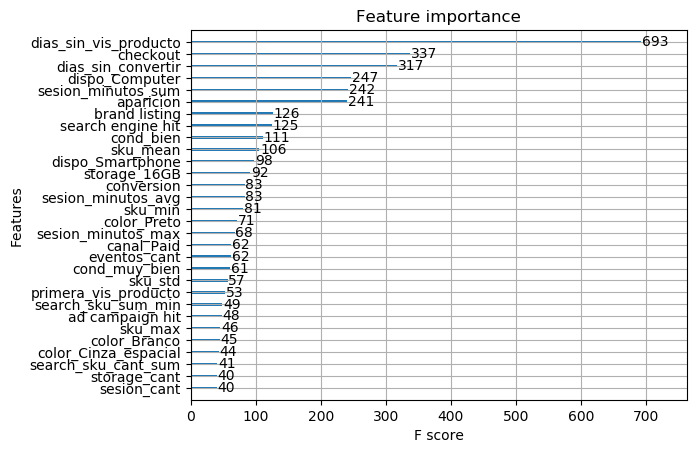

In [45]:
xgb.plot_importance(bst,max_num_features = 30)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


In [46]:
# Graba el modelo si hace falta

#import time
#filename = time.strftime("data/XGBOOST_%Y%m%d_%H%M%S_resguardo.model")
#bst.save_model(filename)


In [47]:
# A saved model can be loaded as follows
# ----------------------------------------------------------------------------------
#del bst
#bst = xgb.Booster()  # init model
#bst.load_model(filename)  # load data



## Evaluacion y generacion de archivos para el submit

In [48]:
#---------------------------------------------------
# Genera lo que se va a submitir
#---------------------------------------------------

# Carga el archivo de evaluacion
test_filename = 'data/trocafone_kaggle_test.csv'
test_labels = pd.read_csv(test_filename, dtype={'label':'float32'},low_memory=False)


submitnumber = '016'

# Arma el achivo de prueba
personas_test = pd.merge(personas, test_labels, on='person', how='inner')
personas_test.fillna(value=0,inplace=True)
DMatriz_pred = xgb.DMatrix(personas_test.iloc[:,1:])


# Genera la prediccion

prediccion = bst.predict(DMatriz_pred)
personas_test['label'] = prediccion 
resultado = personas_test[['person','label']]
resultado = resultado.set_index('person')
#display(resultado.head(3))

#---------------------------------------------------
# GRaba el CSV de salida y el modelo
#---------------------------------------------------

import time

# Arma nombres de los archivos
filename = time.strftime("data/XGBOOST_%Y%m%d_%H%M%S_AUC_884167_")
filename = filename + submitnumber 



#Graba el modelo
#bst.save_model(filename + ".model")

# Graba el el submit que se va a predecir
#resultado.to_csv(filename + ".csv")





## Grid Search


In [52]:
param = {'silent':[1], 'objective': ['binary:logistic']}
param['booster'] = ['gbtree']  #gbtree, gblinear or dart
param['max_depth'] = [6, 7]
param['min_child_weight'] = [1]
param['reg_alpha'] = [10]     #L1 regularization term on weights default=1 
param['learning_rate'] = [0.01, 0.07]    #Step size shrinkage used in update to prevents overfitting. 
param['gamma'] = [50]  # Minimum loss reduction required to make a further partition on a leaf node of the tree   
param['reg_lambda'] = [1]    #L2 regularization term on weight default=0 
param['scale_pos_weight'] = [19]
#param['eval_metric'] = ['auc']
param['nthread'] = [4]
#param['max_delta_step'] = 0  #[default=0] Maximum delta step we allow each leaf output to be
param['subsample'] = 1 #[default=1]
param['colsample_bytree'] = 1 # [default=1]
#param['tree_method'] = 'exact' #auto, exact, approx, hist, gpu_exact, gpu_hist




# Maxima cantidad de rounds
num_round = 50
detencion_sincambios = 5

#Armado dataset
personas_cv = pd.merge(personas, labels, on='person', how='inner')
personas_cv.fillna(value=0,inplace=True)
X_cv, y_cv = personas_cv.iloc[:,1:-1],personas_cv.iloc[:,-1]


xgb_clf = xgb.XGBClassifier(missing=9999999999)

# grid search
rs = GridSearchCV(xgb_clf, param, cv=5, scoring='roc_auc', n_jobs=1, verbose=2)

rs.fit(X_cv, y_cv,eval_metric='auc')




Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1 
[CV]  booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1, total=   7.8s
[CV] booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV]  booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1, total=   8.0s
[CV] booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1 
[CV]  booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1, total=   9.7s
[CV] booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1 
[CV]  booster=gbtree, gamma=50, learning_rate=0.01, max_depth=6, min_child_weight=1, nthread=4, objective=binary:logistic, reg_alpha=10, reg_lambda=1, scale_pos_weight=19, silent=1, total=   6.6s
[CV] booster=gbtree, gamma=50, learning_rate=0.01,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=9999999999,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'silent': [1], 'objective': ['binary:logistic'], 'booster': ['gbtree'], 'max_depth': [6, 7], 'min_child_weight': [1], 'reg_alpha': [10], 'learning_rate': [0.01, 0.07], 'gamma': [50], 'reg_lambda': [1], 'scale_pos_weight': [19], 'nthread': [4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [53]:
rs.best_params_

{'booster': 'gbtree',
 'gamma': 50,
 'learning_rate': 0.07,
 'max_depth': 6,
 'min_child_weight': 1,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 19,
 'silent': 1}